# Okapi, Option Pricing 2021

# Part 1

**Here we use `np.linalg` to solve the linear equations, and `Fraction` to demonstrate the digital value in fraction**


In [1]:
import numpy as np
from fractions import Fraction

## Question f

In [2]:
k = 40 # Strike of option Y
r = 1 # interest rate
s1 = [20, 30, 40, 60] # stock S1 price
s2 = [10, 10, 20, 40] # stock S2 price
c0 = 0.3 # initial price of option X

The payoff of option Y is $(K-\dfrac{1}{(1+r)}(S_1+S_2))^+$

In [3]:
payoff_Y = []
for i in range (len(s1)-1):
    payoff_Y.append (max(k-1/(1+r)*(s1[i+1]+s2[i+1]),0))
print("The payoff of Option Y is", payoff_Y)

The payoff of Option Y is [20.0, 10.0, 0]


### 1st solution:
Given the initial price of option X, $C_0 = 0.3$, we can compute the set of risk neutral probability $(q_1,q_2,q_3)$. From Question d), we know the payoff of X called $C = (1.2, 0.2, 0)^T$. As $C_0 = \dfrac{1}{1+r}\mathbb{E}^{\mathbb{Q}}[C]$, we get $0.3 = \dfrac{1}{2} (1.2q_1+0.2q_2+0q_3)$. By substituting $q_1=2q_3$ and $q_2=1-3q_3$, we get the EMM to be $\mathcal{M} =  \{(q_1,q_2,q_3):q_1=\dfrac{4}{9},\; q_2=\dfrac{1}{3},\; q_3=\dfrac{2}{9}\}$.

In [4]:
# 1st solution, using EMM
a = np.array([[1.2,0.2,0],[1,0,-2],[0,1,3]])
b = np.array([0.6,0,1])
q = np.linalg.solve(a,b)
q1 = Fraction(q[0]).limit_denominator()
q2 = Fraction(q[1]).limit_denominator()
q3 = Fraction(q[2]).limit_denominator()
print("The Equivalent Martingale Measure is q1=",q1,",q2=",q2,",q3=",q3 )

The Equivalent Martingale Measure is q1= 4/9 ,q2= 1/3 ,q3= 2/9


The initial price of option Y is $P_0 = \dfrac{1}{1+r}\mathbb{E}^{\mathbb{Q}}[P]$

In [5]:
price_Y1 = Fraction(1/(1+r)*q.dot(payoff_Y)).limit_denominator()
print("The initial price of option Y is", price_Y1)

The initial price of option Y is 55/9


### 2nd solution
We can find the initial price of option Y by replication. The portfolio with initial wealth x and trading strategy h (number of shares) and z (number of call options) has payoff $\bar{V_1} = x+h(\bar{S_1}-S_0)+z(\bar{C_1}-C_0)$ equal to

\begin{align}
        x \cdot
    \begin{pmatrix}
        1\\
        1\\
        1\\
    \end{pmatrix}
    +h\cdot
        \begin{pmatrix}
        \dfrac{1}{2}(30)-20\\
        \dfrac{1}{2}(40)-20\\
        \dfrac{1}{2}(60)-20\\
    \end{pmatrix}
    +z\cdot
        \begin{pmatrix}
        \dfrac{1}{2}(1.2)-0.3\\
        \dfrac{1}{2}(0.2)-0.3\\
        \dfrac{1}{2}(0)-0.3\\
        \end{pmatrix}
    =
        \begin{pmatrix}
        x-5h+0.3z\\
        x-0h-0.2z\\
        x+10h-0.3z
    \end{pmatrix}
\end{align}
Solving for $\bar{P_1} = \bar{V_1}$, gives
\begin{align} \label{qf}
    \begin{pmatrix}
        10\\
        5\\
        0\\
    \end{pmatrix}
=
        \begin{pmatrix}
        x-5h+0.3z\\
        x-0h-0.2z\\
        x+10h-0.3z
    \end{pmatrix}
\end{align}

In [6]:
c = np.array([[1,-5,0.3],[1,0,-0.2],[1,10,-0.3]])
d = np.array([10,5,0])
x,h,z = np.linalg.solve(c,d)
price_Y2 = Fraction(x).limit_denominator()
print("The initial price of option Y is", price_Y2)

The initial price of option Y is 55/9


# Question g

### 1st Solution:
We can solve this by computing explicitly the solution to the replication equation. From Question (f), we get $x=\dfrac{55}{9}$,$h=-\dfrac{4}{9}$,$z=\dfrac{50}{9}$. The number of bonds equals to the remaining $x-hS_0-zC_0 = \dfrac{55}{9} - 20(-\dfrac{4}{9})-0.3(\dfrac{50}{9})=\dfrac{40}{3}$.

In [7]:
num_bond1 = Fraction(x-h*s1[0]-z*c0).limit_denominator() # number of bond
print("The number of bonds in the portfolio to hedge option Y is:", num_bond1)

The number of bonds in the portfolio to hedge option Y is: 40/3


### 2nd Solution
Alternatively, let us use the positions in the bonds k, in the stocks h, and in the call options z. We look for k, h, and z which replicate the payoff of the put option Y, i.e.
		$V_1 = k(1+r)+hS_1+zC_1=P_1$ that is
		\begin{align}
    \begin{pmatrix}
        20\\
        10\\
        0\\
    \end{pmatrix}
=
        \begin{pmatrix}
        2k+30h+1.2z\\
        2k+40h+0.2z\\
        2k+60h+0z
    \end{pmatrix}
\end{align}
which has the solution $k=\dfrac{40}{3}$,$h=-\dfrac{4}{9}$,$z=\dfrac{50}{9}$.

In [8]:
e = np.array([[2,30,1.2],[2,40,0.2],[2,60,0]])
f = np.array([20,10,0])
k,h1,z1 = np.linalg.solve(e,f)
num_bond2 = Fraction(k).limit_denominator()
print("The number of bonds in the portfolio to hedge option Y is:", num_bond2)

The number of bonds in the portfolio to hedge option Y is: 40/3


# Part 2
## question (a)

In the following code, we conduct replicating for three times. In each time, we need to solve the linear equations $AX = b$, where$$X = (x, h), AX = \overline{V}_{t+1}, b = \overline{P}_{t+1}$$, $AX$ is the value of replicating portfolio at time $t+1$ discounting to time $t$, $b$ is the value of put option at time $t+1$ discounting to time $t$.\
Then in $(x,h)$, x is the value of replicating portfolio, h is the hedging position.

In [9]:
def rep_pricing(s,u,d,k,r,f):
    # t=1, w=U
    a = np.array([[1,s*u*u/(1+r)-s*u+f],[1,s*u*d/(1+r)-s*u+f]])
    b = np.array([max(0,k-s*u*u)/(1+r),max(0,k-s*u*d)/(1+r)])
    x_u,h_u = np.linalg.solve(a,b)
    assert(h_u<0)

    # t=1, w=D
    a = np.array([[1,s*u*d/(1+r)-s*d+f],[1,s*d*d/(1+r)-s*d+f]])
    b = np.array([max(0,k-s*u*d)/(1+r),max(0,k-s*d*d)/(1+r)])
    x_d,h_d = np.linalg.solve(a,b)
    assert(h_d<0)

    # t=0
    a = np.array([[1,s*u/(1+r)-s+f],[1,s*d/(1+r)-s+f]])
    b = np.array([x_u/(1+r),x_d/(1+r)])
    x,h = np.linalg.solve(a,b)
    assert(h<0)

    return x

Then, the answer of question (a) is `rep_pricing(s=10,u=2,d=0.5,k=25,r=0.5,f=0)`. To note that, beacuse it is a perfect market without any short selling fee, we need to set f=0

In [10]:
rep_pricing(s=10,u=2,d=0.5,k=25,r=0.5,f=0)

4.074074074074075

to show it in fraction form

In [11]:
x = rep_pricing(s=10,u=2,d=0.5,k=25,r=0.5,f=0)
Fraction(x).limit_denominator()

Fraction(110, 27)

Hence, the answer of question(a) is$$P_0=\frac{110}{27}$$

## qeustion (b)
use the function we defined before, the answer of qeustion be should be `rep_pricing(s=10,u=2,d=0.5,k=25,r=0.5,f=0.2)`. The difference between the model in question (a) and (b) is the **short selling fee**. Here we set f=0.2

In [12]:
x = rep_pricing(s=10,u=2,d=0.5,k=25,r=0.5,f=0.2)
Fraction(x).limit_denominator()

Fraction(28859, 6750)

In [13]:
x

4.275407407407408

Hence, the answer of question (b) is $$P_0 = \frac{28859}{6750} = 4.2754$$

## Appendix: question (c)
In this part, let's plot an graph of put option price $P_0$ and short selling fee rate $f$.

[Text(0.5, 1.0, 'relationship between option price and short selling fee'),
 Text(0, 0.5, 'put option price'),
 Text(0.5, 0, 'short selling fee rate')]

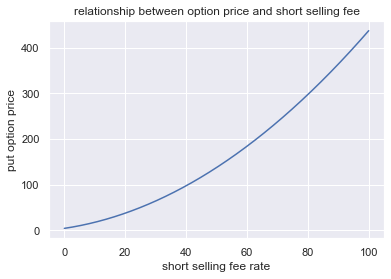

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fees = np.arange(0,100,0.02)
prices = [rep_pricing(s=10,u=2,d=0.5,k=25,r=0.5,f=f) for f in fees]
plt.plot(fees, prices)
plt.gca().set(title="relationship between option price and short selling fee",
              ylabel='put option price', xlabel='short selling fee rate')

According to the Appendix in the report, the relationship between option price and selling fee is quadratic.
$$\tilde{p}(1+r) = p(1+r) + \left(\left(\frac{(f_{u d} - f_{u u}) - (f_u -f_d)}{u-d} - \frac{f_{u u} - 2f_{u d} + f_{d d}}{(u-d)^2}\right) + \frac{f_{u u} - 2f_{u d} + f_{d d}}{(u-d)^2}F\right)F,$$
where $\tilde{p}$ is the option price with short selling fee, $p$ is the option price without short selling fee (i.e. $F=0$), $F$ is the fee rate of short selling.\
The graph above is also an evidence for that conclusion.